Reference: https://github.com/timothyyu/ml_monorepo/blob/master/tsfresh/notebooks/robot_failure_example.ipynb

In [1]:
#!pip install tsfresh

## Imports

In [14]:
import pandas as pd
import tsfresh
from tsfresh import examples

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Download dataset

The data set documents **88 robot executions** (id 1 - 88), which are a subset of the **[Robot Execution Failures Data Set](https://archive.ics.uci.edu/ml/datasets/Robot+Execution+Failures)**. For the purpose of simplicity we are only differentiating between successfull and failed executions (y). For each execution 15 force (F) and torque (T) samples are given, which were measured at regular time intervals for the spatial dimensions x, y, and z. Therefore each row of the data frame references a specific execution (id), a time index (index) and documents the respective measurements of 6 sensors (F_x, F_y, F_z, T_x, T_y, T_z).

In [3]:
examples.download_robot_execution_failures()

## Load dataset
- **`x`**: Pandas DataFrame
- **`y`**: Pandas Series

In [4]:
x, y = examples.load_robot_execution_failures()

In [5]:
x

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


- The first column is the DataFrame index and has no meaning here.
- There are **six** different time series (F_x, F_y, F_z, T_x, T_y, T_z) for the different **sensors**.
- The different robots are denoted by the ids column.

In [6]:
with pd.option_context('display.max_rows', None):
    print(y)

1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41     True
42    False
43     True
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68     True
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84  

## Example with y=0 (reporting no failure)

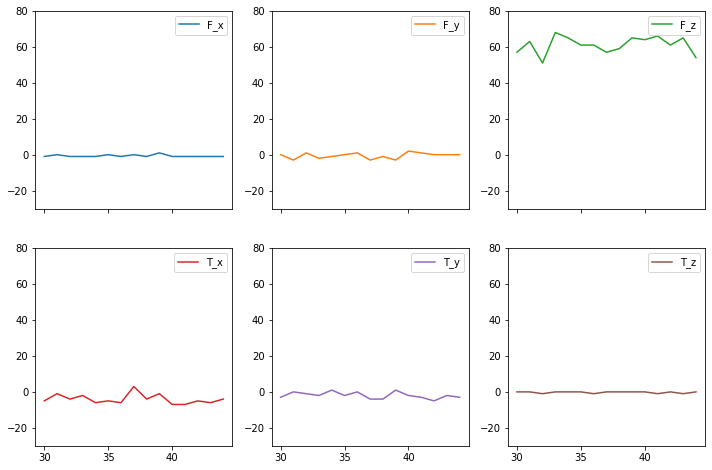

In [7]:
x[x.id == 3][["F_x","F_y","F_z","T_x","T_y","T_z"]].plot(subplots=True,
                                                         sharex=True,
                                                         layout=(2, 3),
                                                         ylim=(-30,80),
                                                         figsize=(12,8));

## Example wit y=1 (reporting a failure)

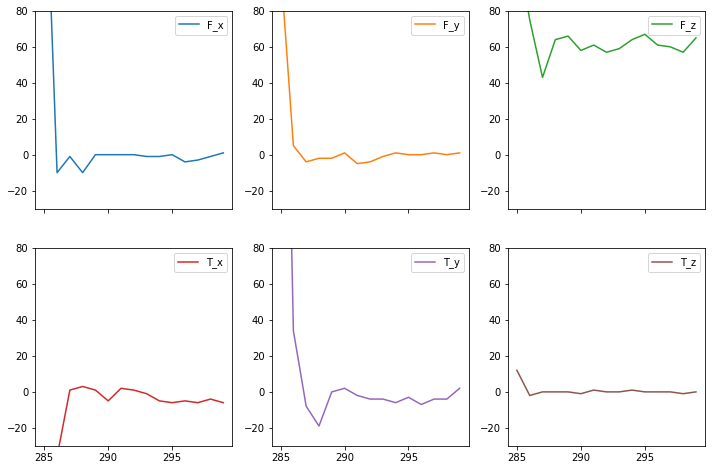

In [8]:
x[x.id == 20][["F_x","F_y","F_z","T_x","T_y","T_z"]].plot(subplots=True,
                                                          sharex=True,
                                                          layout=(2, 3),
                                                          ylim=(-30,80),
                                                          figsize=(12,8));

# Time Feature Engneering (Generating time features) with TSFresh\

You end up with a DataFrame with all **more than 1200 different extracted features**. 

We can use the data to extract time series features using tsfresh. We want to extract features for each time series, that means for each robot execution (which is our id) and for each of the measured sensor values (F_* and T_*).

You can think of it like this: tsfresh will result in a single row for each id and will calculate the features for each columns (we call them "kind") separately.

The time column is our sorting column. For an overview on the data formats of tsfresh, please have a look at the [documentation](https://tsfresh.readthedocs.io/en/latest/text/data_formats.html).



In [12]:
# We are very explicit here and specify the `default_fc_parameters`. If you remove this argument,
# the ComprehensiveFCParameters (= all feature calculators) will also be used as default.
# Have a look into the documentation (https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html)
# or one of the other notebooks to learn more about this.

extraction_settings = tsfresh.feature_extraction.ComprehensiveFCParameters()
impute_fn           = tsfresh.utilities.dataframe_functions.impute # we impute = remove all NaN features automatically

x_featEng = tsfresh.extract_features(x,
                                     column_id="id",
                                     column_sort="time",
                                     default_fc_parameters=extraction_settings,
                                     impute_function=impute_fn)

Feature Extraction:   0%|                                                                            | 0/10 [00:00<?, ?it/s]


TypeError: acf() got an unexpected keyword argument 'unbiased'

## Feature Selection ([TSFresh documentation](https://tsfresh.readthedocs.io/en/latest/text/feature_filtering.html))

Using the hypothesis tests implemented in tsfresh it is now possible to select only the relevant features out of this large dataset.

tsfresh will do a hypothesis test for each of the features to check, if it is relevant for your given target.

Only **around 300 features were classified as relevant enough**.

In [ ]:
#x_featSel = tsfresh.select_features(x_featEng, y)
X_filtered = extract_relevant_features(df, y, 
                                       column_id='id', column_sort='time', 
                                       default_fc_parameters=extraction_settings)

In [16]:
x_featSel.head()

## Train and evaluate classifier

In [ ]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)

#### Train tree without feeature section

In [ ]:
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
print(classification_report(y_test, cl.predict(X_test)))

#### Train tree with feeature section

In [ ]:
cl2 = DecisionTreeClassifier()
cl2.fit(X_filtered_train, y_train)
print(classification_report(y_test, cl2.predict(X_filtered_test)))